In [2]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct path and file name
filepath=(r"C:\Users\USER\Downloads\AgeWise\Dataset\final_datausage_cleaned.csv")
df = pd.read_csv(filepath)

In [3]:
# 3. Select features and target
features = ['sex', 'state', 'strata', 'population', 'beds', 'staff_count']
target = 'is_elderly'

# 4. Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in ['age', 'sex', 'state', 'strata']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 5. Define X and y
X = df_encoded[features]
y = df_encoded[target]

Accuracy: 0.7183231123657484

Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.96      0.82     21169
        True       0.69      0.18      0.29      9650

    accuracy                           0.72     30819
   macro avg       0.70      0.57      0.56     30819
weighted avg       0.71      0.72      0.66     30819


Confusion Matrix:
 [[20354   815]
 [ 7866  1784]]


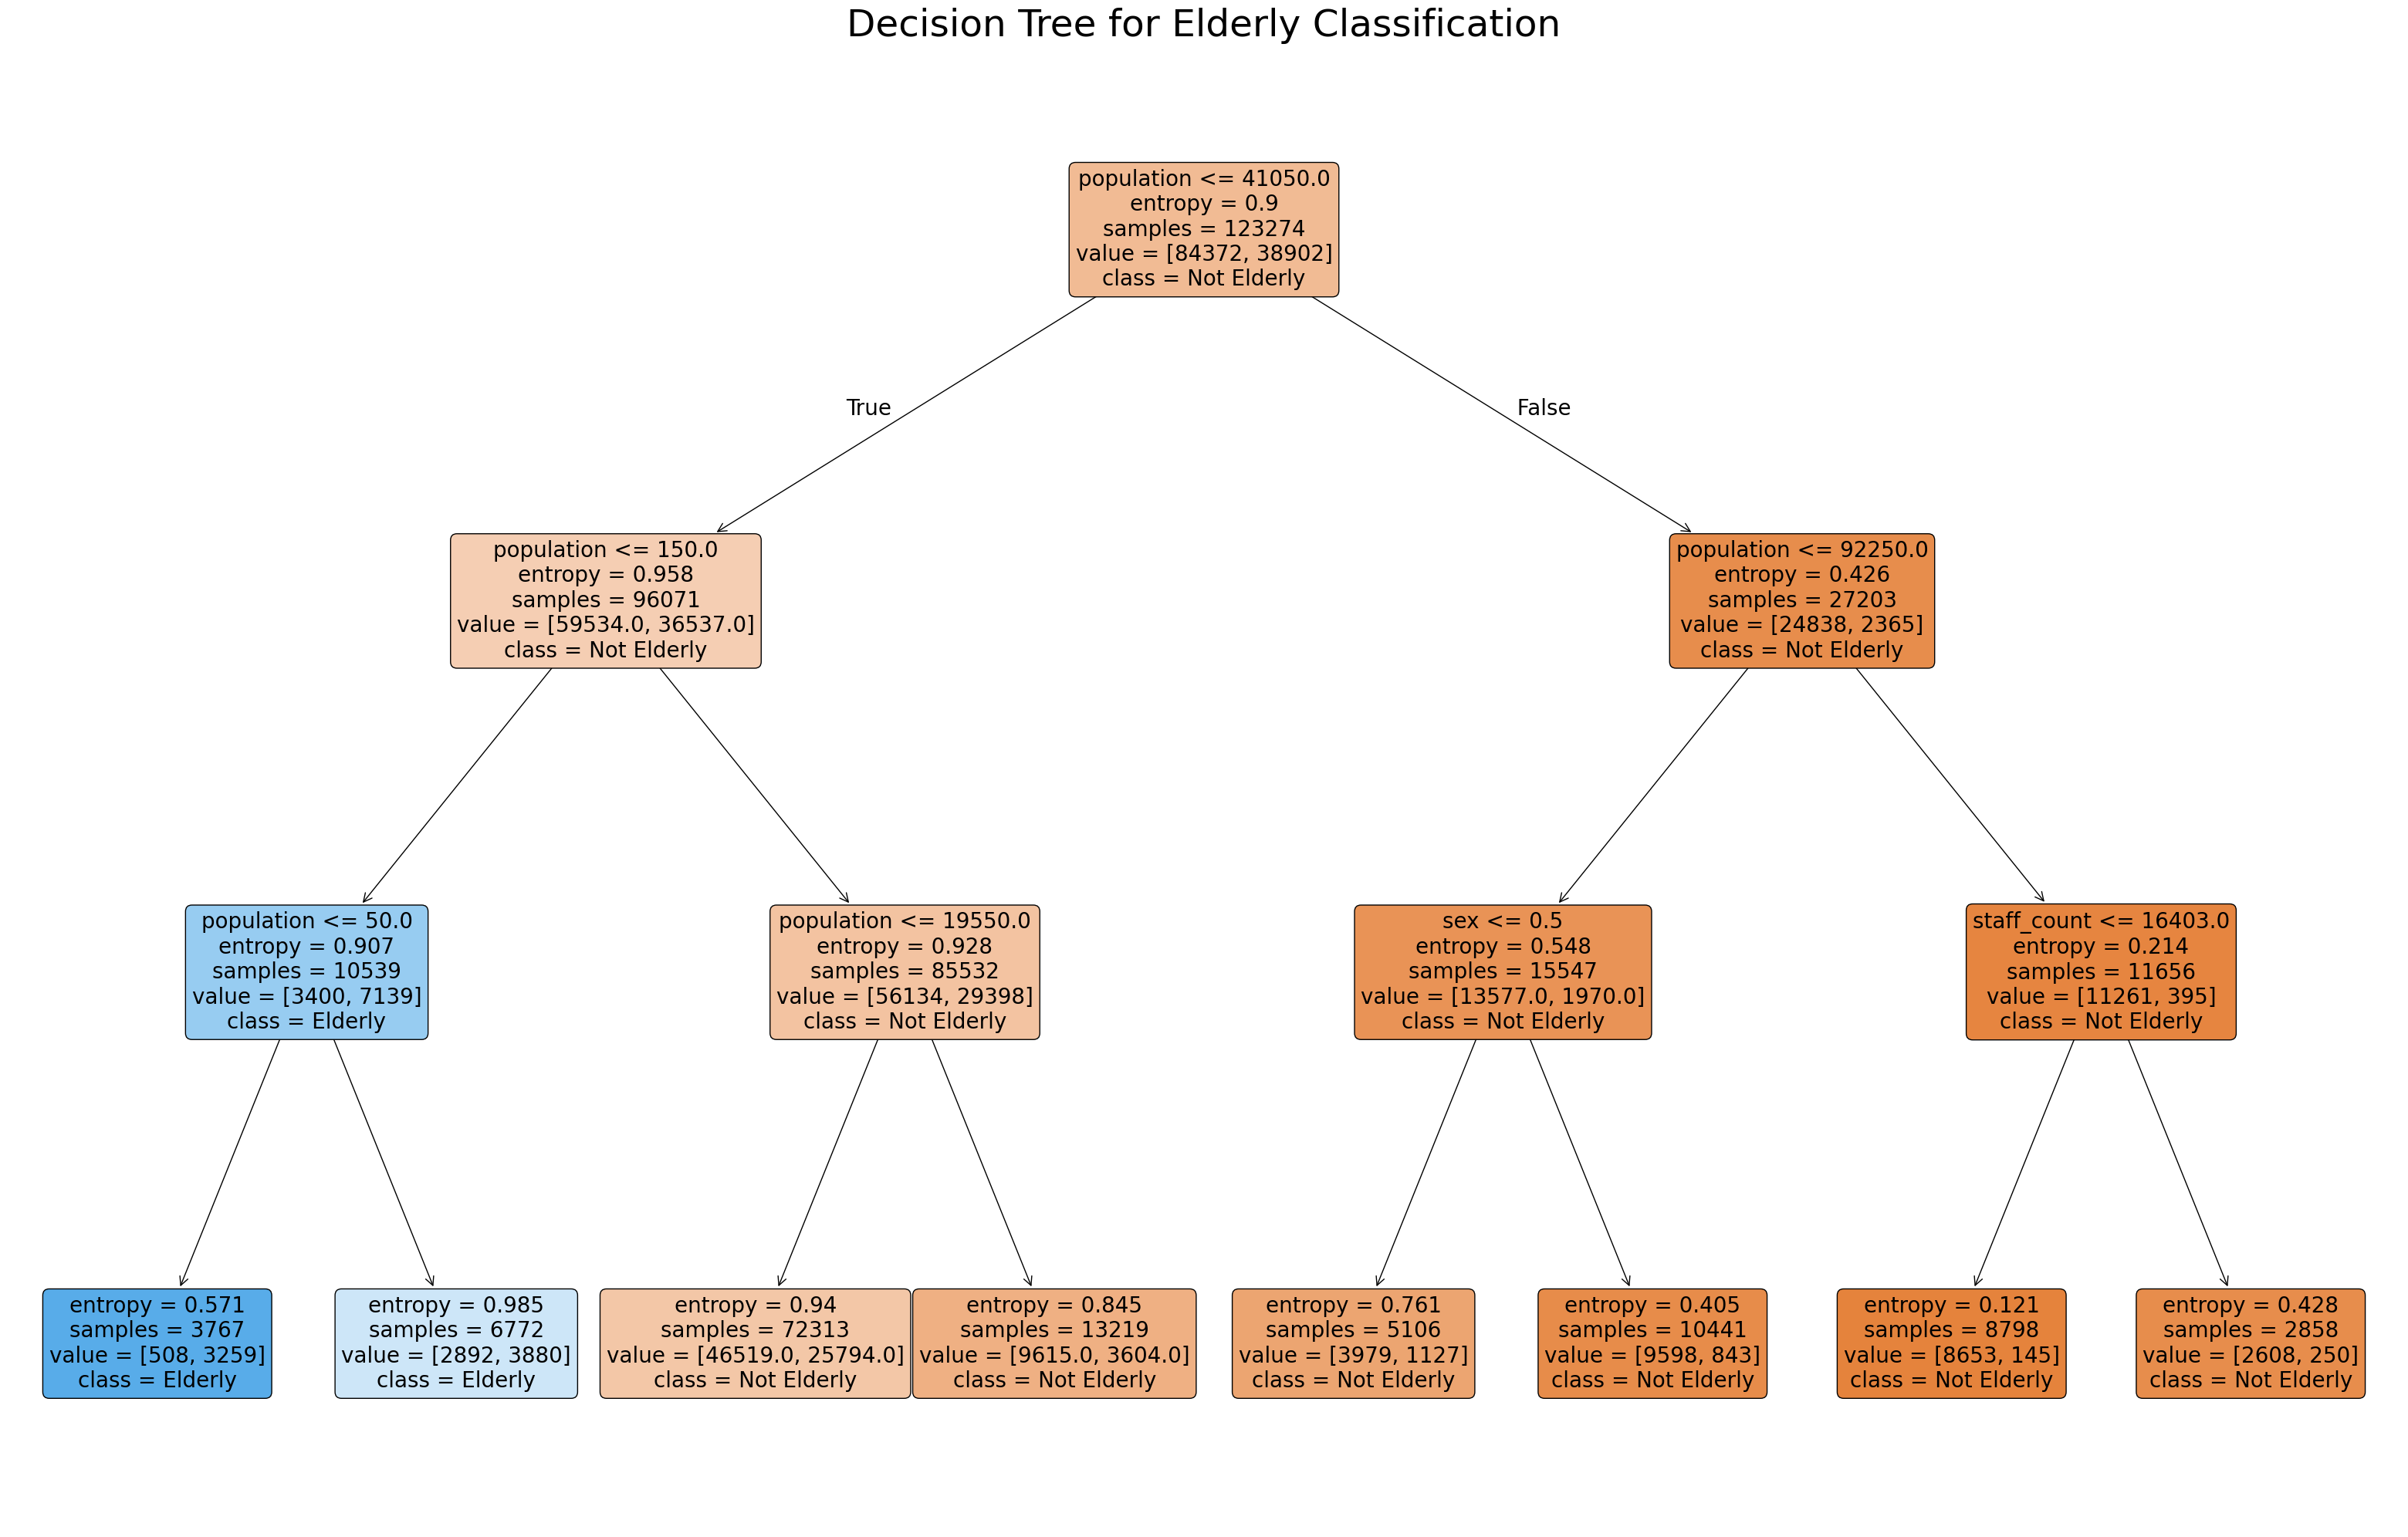

In [5]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train decision tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Visualize decision tree
plt.figure(figsize=(40, 25))
from sklearn import tree
tree.plot_tree(clf, feature_names=features, class_names=['Not Elderly', 'Elderly'], filled=True, rounded=True, fontsize = 20)
plt.title("Decision Tree for Elderly Classification", fontsize = 35)
plt.show()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_prob = clf.predict_proba(X_test)[:, 1]

y_test_int = y_test.astype(int)
mae = mean_absolute_error(y_test_int, y_pred_prob)
rmse = np.sqrt(mean_squared_error(y_test_int, y_pred_prob))
r2 = r2_score(y_test_int, y_pred_prob)

print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE (Mean Absolute Error): 0.3771
RMSE (Root Mean Squared Error): 0.4329
R² Score: 0.1286
